# Erasmus Neural Networks
http://michalbereta.pl/nn
## Widrow-Hoff rule of learning


## Before you start

Exacute the examples.

Then, do the tasks and send back the notebook.

Change the name of this notebook according to the schema: {YourSurname}\_{YourFirstName}\_{OriginalFileName}.

Be sure to fill all places with "YOUR ANSWER HERE".

When ready, send the notebook, with all the necessary files zipped, to the teacher.

### Linear regression

In regression problems, the required output of the model is a numeric value.

In the following example, we generate a data from one dimensional problem, i.e., there is just one input (x axis). The output value is numerical (y axis).

The values of `a` and `b` in 

`y = ax + b` 

are the (unknown to us) parameters of some phenomenon.

Usually, the training data we have is in some way 'noisy' (for example, due to the measurement errors). Nevertheless, we want to estimate the real values of `a` and `b`.

x= [-6.  -5.5 -5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5
  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5]
tr [-3.99217505 -3.85810742 -3.14570831 -3.07896522 -2.93467442 -2.3958644
 -2.10506764 -2.0388142  -1.37166553 -1.18571316 -1.18700224 -0.62782497
 -0.28938082  0.04410848  0.26238589  0.215474    0.76931473  1.21505325
  1.47988638  1.72731677  1.95591358  2.04742238  2.43600696  2.94114857]


<IPython.core.display.Javascript object>


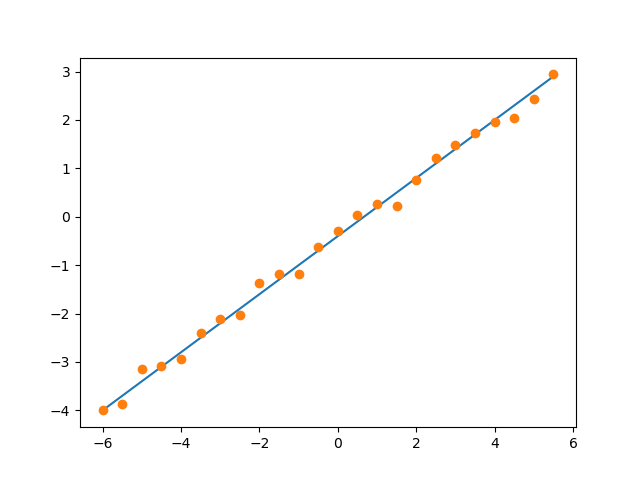

In [2]:
%matplotlib notebook

import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation



xmin = -6
xmax = 6
#ymin = -6
#ymax = 6

x = np.arange(xmin, xmax, 0.5)
print ('x=',x)

#real values of unknown process
a = 0.6
b = -0.4
d = a*x + b

#training data with noise (e.g., measurement errors)
sigma = 0.2
tr_d = d + np.random.randn(len(d)) * sigma


print('tr', tr_d)
#plt.xlim(xmin,xmax)
#plt.ylim(ymin,ymax)

plt.plot(x, d)
plt.plot(x, tr_d, 'o')

plt.show()

### Linear regression - estimating parameters of a linear model in one step with MSE minimization

In the following example, the parameters `a` and `b` are estimated in one step. 

There is no iterative learning here!

x= [-6.  -5.5 -5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5
  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5]


<IPython.core.display.Javascript object>


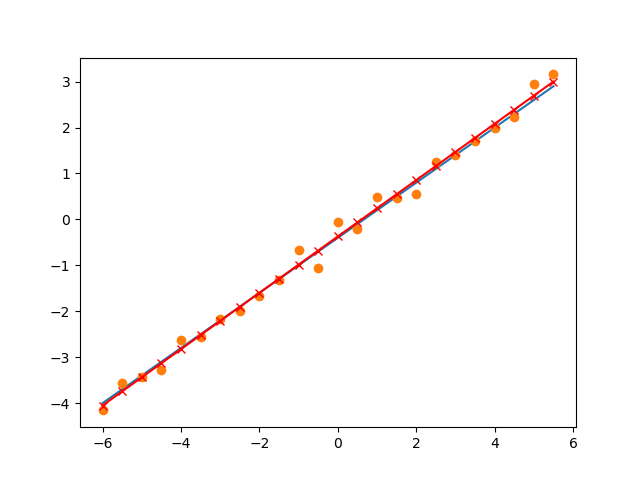

X= [[-6.   1. ]
 [-5.5  1. ]
 [-5.   1. ]
 [-4.5  1. ]
 [-4.   1. ]
 [-3.5  1. ]
 [-3.   1. ]
 [-2.5  1. ]
 [-2.   1. ]
 [-1.5  1. ]
 [-1.   1. ]
 [-0.5  1. ]
 [ 0.   1. ]
 [ 0.5  1. ]
 [ 1.   1. ]
 [ 1.5  1. ]
 [ 2.   1. ]
 [ 2.5  1. ]
 [ 3.   1. ]
 [ 3.5  1. ]
 [ 4.   1. ]
 [ 4.5  1. ]
 [ 5.   1. ]
 [ 5.5  1. ]]
(24, 2)
w= [ 0.61337722 -0.37148694]
training mse =  0.7802503502233417
testing mse =  0.11394604342350467


<IPython.core.display.Javascript object>


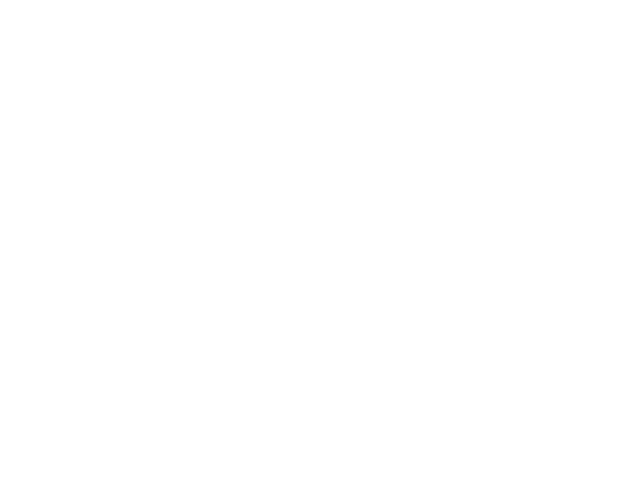

In [3]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib notebook

xmin = -6
xmax = 6
#ymin = -6
#ymax = 6

x = np.arange(xmin, xmax, 0.5)
print ('x=',x)

#real values of unknown process
a = 0.6
b = -0.4
d = a*x + b

#training data with noise (e.g., measurement errors)
sigma = 0.2
tr_d = d + np.random.randn(len(d)) * sigma

#plt.xlim(xmin,xmax)
#plt.ylim(ymin,ymax)

plt.plot(x, d)
plt.plot(x, tr_d, 'o')

#we add the column with "1" values directly here - not efficient in general
X = np.vstack((x, np.ones(len(tr_d)))).T
print('X=',X)
print(X.shape)

#weights for the neuron - there is no iterative process here!
w = np.dot(np.dot( np.linalg.inv( np.dot(X.T, X) ), X.T), tr_d)
print('w=', w)

#neuron responses
y = w[0]*x + w[1]
plt.plot(x, y, 'r')
plt.plot(x, y, 'rx')

#training error
tr_mse = np.dot((y - tr_d).T, (y - tr_d))
print('training mse = ', tr_mse)

#sample some new points as test data
x_test = np.arange(xmin, xmax, 0.3)
d_test = a*x_test + b
y_test = w[0]*x_test + w[1]
test_mse = np.dot((y_test - d_test).T, (y_test - d_test))
print('testing mse = ', test_mse)

plt.figure()
plt.plot(x_test, d_test)
plt.plot(x_test, y_test,'rx')

plt.show()

### Perceptron training with Widrow-Hoff rule (online version) for classification problems (two classes)

In the following example we optimize the perceptron weights with Widrow-Hoff rule. MSE is minimized during the process.

The two classes are ancode numerically as `1` and `-1`.

#### DO NOT USE THIS CODE AS A TEMPLATE FOR YOUR IMPLEMENTATIONS!

w= [-0.32359346  0.62378896 -0.50362894]


<IPython.core.display.Javascript object>


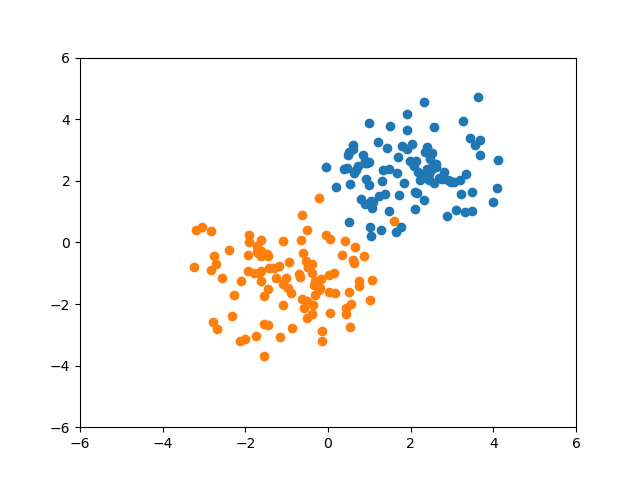

(200, 2)
(2,)
(3,)
end


In [4]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib notebook

#example data from two classes, normal distributions
num = 100
x2 = np.random.multivariate_normal([-1,-1], np.array([[1,0],[0,1]]),num)
x1 = np.random.multivariate_normal([2,2], np.array([[1,0],[0,1]]),num)
xall = np.vstack((x1,x2))
labels = np.ones(num*2)
labels[num:] = -1.0

xmin = -6
xmax = 6
ymin = -6
ymax = 6

#weights initialization - random, small values, both positive and negative
#bias signal is connected with w[0]
w = 2*np.random.rand(3) - 1
#w = np.zeros(3) #try it: not recommended in general
print ('w=',w)


delta = 0.01 #grid accuracy for visualization
x = np.arange(xmin, xmax, delta)
y = np.arange(ymin, ymax, delta)
X, Y = np.meshgrid(x, y)
Z = X*w[1] + Y*w[2] + w[0]

fig = plt.figure()

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.plot(x1[:,0],x1[:,1],'o')
plt.plot(x2[:,0],x2[:,1],'o')

print (xall.shape)
print (w[1:].shape)
print (w.shape)
#one iteration of learning algorithm
def update(i):
    global w
    print()
    print ('iteration=',i)

    #neuron resposnses for examples from both classes
    #we assume they should be 1 or -1 depending on te class
    ans = np.dot(xall, w[1:]) + w[0]  
    
    print("ans= ", ans)
    #mean squared error
    mse = np.sqrt(((ans - labels) * (ans - labels)).sum())
    print ('mse=',mse)

    errors = (ans[0:num] <= 0).sum() + (ans[num:] > 0).sum()
    print ('errors=',errors)
    
    #learning rate
    eta = 0.001
    #online learning
    #weights modification
    for k in range(num*2):
        w[1] += eta*(labels[k] - ans[k])*xall[k,0]
        w[2] += eta*(labels[k] - ans[k])*xall[k,1]
        w[0] += eta*(labels[k] - ans[k])*1.0  #bias weight modification        
        #weights vector normalization
        #try it, it seems to be a bad idea here
#        w = w/np.linalg.norm(w) 
    print ('w=',w)
    #vizualization
    plt.clf()
    plt.plot(x1[:,0],x1[:,1],'o')
    plt.plot(x2[:,0],x2[:,1],'o')
    Z = X*w[1] + Y*w[2] + w[0]
    Z[Z>0] = 1
    Z[Z<=0] = -1
    im = plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
                origin='lower', extent=[xmin, xmax, ymin, ymax],
                vmax=abs(Z).max(), vmin=-abs(Z).max())

    
#start of the algoirthm
ani = animation.FuncAnimation(fig, update, interval=1000, blit=False)
plt.show()

print ('end')


### Task 1

Prepare your own implementation of perceptron learning using Widrow-Hoff algorithm (for classification problems with two classes).

– Use the online or batch mode

– Be ready for any number of attributes (inputs to perceptron)

– Use matrix / vector notation from numpy, avoid unnecessary looping.


In [5]:
import numpy as np

class Perceptron:
    def __init__(self, dim, learningrate=0.001, bias=1):
        self.weights=2*np.random.rand(dim+1) - 1 
        self.weights[0]=bias
        self.learningrate = learningrate

    def predict(self, inputs):
        return np.where(self.activation(inputs) >= 0.0, 1, -1)
    
    def activation(self, inputs):
        return np.dot(inputs, self.weights[1:]) + self.weights[0] 
    
    def learn(self, inputs, labels):
    
        epoch=0
        errors=1
        
        while errors!=0:
            
            errors=0
            print("Epoch "+str(epoch)+"\n")
           
            ans=self.predict(inputs)
            errors=np.count_nonzero(labels-ans)
                
            for i, input in enumerate(inputs):
                
                update = self.learningrate*(labels[i] - ans[i])
                self.weights[1:] += update*input
                self.weights[0] += update        
          
            print(self.weights, "errors=", errors)
            epoch+=1
            
    def __str__(self):
        return '(' + str(self.weights)  + ')'
    def __repr__(self):
        return '(' + str(self.weights) + ')'

p1=Perceptron(4)
p1 
tab=np.array([[8,7,9,6], [7,7,7,6], [6,7,6,6]])
tab2=np.array([1,-1,-1])
p1.learn(tab, tab2)


Epoch 0

[ 1.002      -0.58481413 -0.91889944 -0.46623933  0.04693288] errors= 1
Epoch 1

[ 1.004      -0.56881413 -0.90489944 -0.44823933  0.05893288] errors= 1
Epoch 2

[ 1.006      -0.55281413 -0.89089944 -0.43023933  0.07093288] errors= 1
Epoch 3

[ 1.008      -0.53681413 -0.87689944 -0.41223933  0.08293288] errors= 1
Epoch 4

[ 1.01       -0.52081413 -0.86289944 -0.39423933  0.09493288] errors= 1
Epoch 5

[ 1.012      -0.50481413 -0.84889944 -0.37623933  0.10693288] errors= 1
Epoch 6

[ 1.014      -0.48881413 -0.83489944 -0.35823933  0.11893288] errors= 1
Epoch 7

[ 1.016      -0.47281413 -0.82089944 -0.34023933  0.13093288] errors= 1
Epoch 8

[ 1.018      -0.45681413 -0.80689944 -0.32223933  0.14293288] errors= 1
Epoch 9

[ 1.02       -0.44081413 -0.79289944 -0.30423933  0.15493288] errors= 1
Epoch 10

[ 1.022      -0.42481413 -0.77889944 -0.28623933  0.16693288] errors= 1
Epoch 11

[ 1.024      -0.40881413 -0.76489944 -0.26823933  0.17893288] errors= 1
Epoch 12

[ 1.026      -0.

### Task 2

Use the 5D data to train your perceptron based on examples from data5D_train.csv. Last column is the class label.

Generate answers (as 1 or -1) for data in data5D_test.csv and save them to a file.

As the output of the model is numerical, the final classification decision is as follow: for the neuron output signal >0 classify the input to the first class (lable 1), otherwise to the second (label -1).

In [6]:
f = open('data5D_train.csv','r')
lines = f.readlines()

temp=np.loadtxt(lines , dtype="float")
labels=np.concatenate(np.array(temp)[:,len(temp[0])-1:])
values=np.array(temp)[:,:len(temp[0])-1]

f.close()


In [7]:
p2=Perceptron(len(values[0]), 0.001,1)          
p2.learn(values, labels)

Epoch 0

[ 0.616       0.25103244  0.88734335  0.33086011 -0.67986117 -0.61987291] errors= 254
Epoch 1

[ 0.316       0.24717981  0.74995649  0.31858514 -0.77314166 -0.41411384] errors= 234
Epoch 2

[ 0.1         0.23041477  0.59909406  0.28966215 -0.82325476 -0.23573575] errors= 198
Epoch 3

[-0.002       0.1997581   0.46573367  0.26100505 -0.82431538 -0.08098615] errors= 147
Epoch 4

[-0.072       0.1767589   0.3466687   0.22929321 -0.80979252  0.05337908] errors= 125
Epoch 5

[-0.102       0.15358805  0.24882318  0.21383433 -0.7809004   0.16671653] errors= 101
Epoch 6

[-0.122       0.12667921  0.17411922  0.18848852 -0.75346872  0.24314309] errors= 74
Epoch 7

[-0.118       0.11049325  0.1093624   0.16583207 -0.72730869  0.30800191] errors= 58
Epoch 8

[-0.114       0.09290653  0.05469156  0.14699608 -0.70320691  0.36129019] errors= 48
Epoch 9

[-0.104       0.07786257  0.01380362  0.12713762 -0.6853086   0.39931334] errors= 37
Epoch 10

[-0.106       0.07006611 -0.01281274  0.1118

In [8]:
f = open('data5D_test.csv','r')
lines = f.readlines()
tests=np.loadtxt(lines , dtype="float")
print(tests)

f.close()

[[-0.21072208 -0.79501808  0.28437907  0.86837059  0.73060236]
 [-0.12111626  0.60824274 -0.47358205  0.69620996  0.21952921]
 [-0.23219499 -0.62105231  0.05503385  0.48291495  0.8759104 ]
 ...
 [-0.28960944 -0.15619135  0.90507601  0.59775244 -0.09617161]
 [ 0.67907071  0.00613763  0.47191729  0.65510653  0.4179075 ]
 [ 0.03854587  0.86104938  0.23411752 -0.25446469 -0.72048086]]


In [9]:
guess=p2.predict(tests)

for i, item in enumerate(guess):
    print("The prediction for sample "+str(i)+" is "+str(item))
    
f = open('result2.txt','w')
for x in guess:
    print(x, file=f)
f.close()

The prediction for sample 0 is -1
The prediction for sample 1 is -1
The prediction for sample 2 is 1
The prediction for sample 3 is -1
The prediction for sample 4 is -1
The prediction for sample 5 is 1
The prediction for sample 6 is 1
The prediction for sample 7 is -1
The prediction for sample 8 is -1
The prediction for sample 9 is -1
The prediction for sample 10 is -1
The prediction for sample 11 is -1
The prediction for sample 12 is 1
The prediction for sample 13 is -1
The prediction for sample 14 is -1
The prediction for sample 15 is -1
The prediction for sample 16 is -1
The prediction for sample 17 is 1
The prediction for sample 18 is 1
The prediction for sample 19 is 1
The prediction for sample 20 is -1
The prediction for sample 21 is 1
The prediction for sample 22 is 1
The prediction for sample 23 is 1
The prediction for sample 24 is -1
The prediction for sample 25 is 1
The prediction for sample 26 is 1
The prediction for sample 27 is 1
The prediction for sample 28 is -1
The pred

### Task 3

Implement Widrow-Hoff online training (update of weights is done after each training example) for linear regression problem. Use the previous example as the starting point.

x= [-6.  -5.5 -5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5
  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5]


<IPython.core.display.Javascript object>


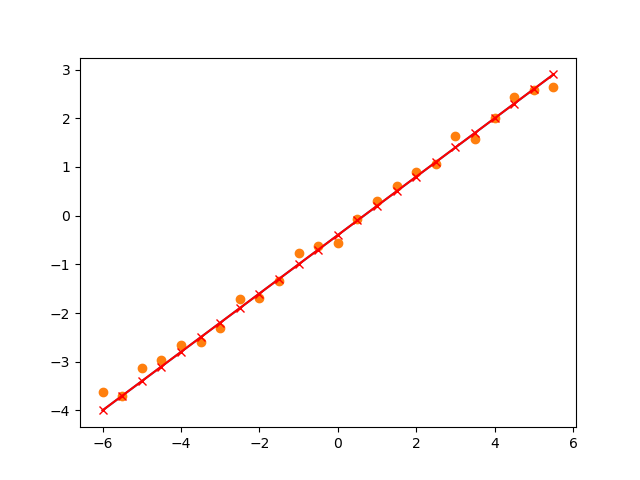

X= [[-6.   1. ]
 [-5.5  1. ]
 [-5.   1. ]
 [-4.5  1. ]
 [-4.   1. ]
 [-3.5  1. ]
 [-3.   1. ]
 [-2.5  1. ]
 [-2.   1. ]
 [-1.5  1. ]
 [-1.   1. ]
 [-0.5  1. ]
 [ 0.   1. ]
 [ 0.5  1. ]
 [ 1.   1. ]
 [ 1.5  1. ]
 [ 2.   1. ]
 [ 2.5  1. ]
 [ 3.   1. ]
 [ 3.5  1. ]
 [ 4.   1. ]
 [ 4.5  1. ]
 [ 5.   1. ]
 [ 5.5  1. ]]
(24, 2)
x= [-6.  -5.5 -5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5
  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5] 
w= [0.20589532] 
d= [-4.  -3.7 -3.4 -3.1 -2.8 -2.5 -2.2 -1.9 -1.6 -1.3 -1.  -0.7 -0.4 -0.1
  0.2  0.5  0.8  1.1  1.4  1.7  2.   2.3  2.6  2.9]
w= [0.60002243]
bias= -0.39900871224261536
training mse =  0.5969169650048396
testing mse =  3.928106056894834e-05


<IPython.core.display.Javascript object>


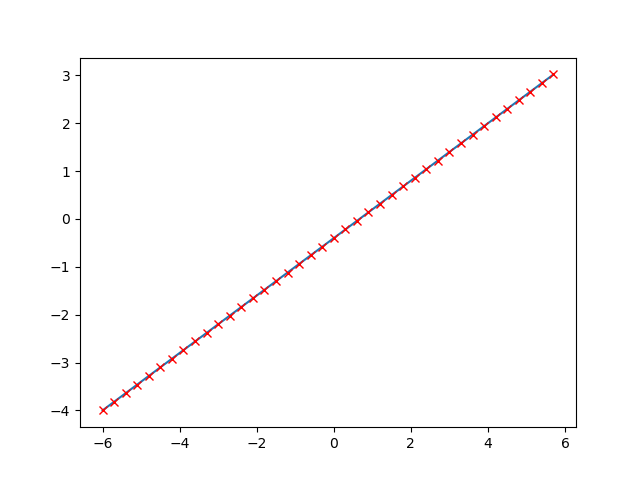

In [11]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib notebook

xmin = -6
xmax = 6
#ymin = -6
#ymax = 6
learningrate=0.001
bias=1

x = np.arange(xmin, xmax, 0.5)
print ('x=',x)

#real values of unknown process
a = 0.6
b = -0.4
d = a*x + b

#training data with noise (e.g., measurement errors)
sigma = 0.2
tr_d = d + np.random.randn(len(d)) * sigma

#plt.xlim(xmin,xmax)
#plt.ylim(ymin,ymax)

plt.plot(x, d)
plt.plot(x, tr_d, 'o')

#we add the column with "1" values directly here - not efficient in general
# Changer à partir d'ici
X = np.vstack((x, np.ones(len(tr_d)))).T
print('X=',X)
print(X.shape)

#weights for the neuron - there is no iterative process here!
#w = np.dot(np.dot( np.linalg.inv( np.dot(X.T, X) ), X.T), tr_d)

w=2*np.random.rand(1) - 1 

print("x=",x,"\nw=", w, "\nd=", d)

error=1


for epoch in range(300):
    ans= w*x+bias
    error=0
    for i, input in enumerate(x) : 
        error+= np.where(d[i]-ans[i]!=0, 1, 0)
        update = learningrate*(d[i] - ans[i])
        w += update*x[i]
        bias += update 

print('w=', w)
print('bias=', bias)


#neuron responses
y = w[0]*x + bias #w[1]
plt.plot(x, y, 'r')
plt.plot(x, y, 'rx')

#training error
tr_mse = np.dot((y - tr_d).T, (y - tr_d))
print('training mse = ', tr_mse)

#sample some new points as test data
x_test = np.arange(xmin, xmax, 0.3)
d_test = a*x_test + b
y_test = w[0]*x_test + bias #w[1]
test_mse = np.dot((y_test - d_test).T, (y_test - d_test))
print('testing mse = ', test_mse)

plt.figure()
plt.plot(x_test, d_test)
plt.plot(x_test, y_test,'rx')

plt.show()